## Problem Constant

<a name="prob_constant"></a>

** Problem constant growth**:
<!-- [lab5:prob:constant] -->

Note that though the daisy growth rate per unit
time depends on the amount of available fertile land, it is not
otherwise coupled to the environment (i.e. $\beta_i$ is note a function
of temperature. Making the growth a function of bare ground, however, 
keeps the daisy population bounded and the daisy population will
eventually reach some steady state.  The next python cell has a script
that runs a fixed timestep Runge Kutte routine that calculates area
coverage of white and black daisies for fixed growth rates $\beta_w$ and $\beta_b$.
Try changing these growth rates (specified in the derivs5 routine) and
the initial white and black concentrations (specified in the fixed_growth.yaml file
discussed next).

1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

    <font color = "red"> complete </font>

2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.
    
    <font color = "red"> complete </font>

3.  Can you determine when non-zero steady states are achieved? Explain.

    <font color = "red"> Non-zero steady states can be identified by finding when dA/dt approaches zero (i.e. negligible change of concentration in time == steady state), and checking the value that it approaches -- where it approaches a non-zero value, that is a non-zero steady state.   This will occurs when the growth rate multiplied by the fractional coverage of both daisy types combined is greater than the death rate. </font>

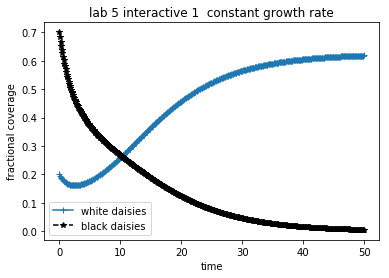

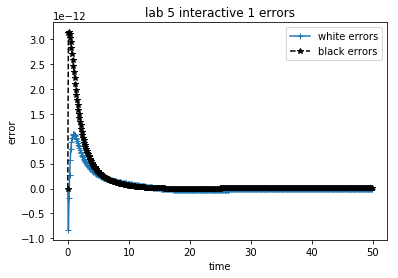

In [2]:
#
## 4.1  integrate constant growth rates with fixed timesteps
#
%matplotlib inline
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import yaml

class Integ51(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None
    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.5  # growth rate for black daisies
        beta_w = 0.8 # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f
    
    

theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1,1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1,1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out=theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

## Problem Coupling

<a name="prob_coupling"></a>

**Problem Coupling**  Consider daisies with the same albedo as the
planet, i.e. ’grey’ or neutral daisies, as specified in derivs5 routine
below.  

1.  For the current value of L (0.2) in the file coupling.yaml, 
    the final daisy steady state is zero.
    Why is it zero?
    
    <font color = "red"> The initial fractional coverage, and constants result in a first temperature of 203.6 K, which is outside of the range 277.5 to 312.5 K, so the growth rate $\beta_g$ is 0, and exceeded by the death rate $\chi$, with no mechanism to recover. </font>

2.  Find a value of L which leads to a non-zero steady state.

    <font color = "red"> Non-zero steady states start to occur at ~ L = 0.59 </font>

3.  What happens to the emission temperature as L is varied?  Make a plot of
    $L$ vs. $T_E$ for 10-15 values of $L$.  To do this, I  overrode
    the value of L from the init file by passing a new value into 
    the IntegCoupling constructor (see [Appendix A.4.4](<a name=sec_override></a>)).  
    This allowed me to put
    
    ```
    theSolver = IntegCoupling("coupling.yaml",newL)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    ```
    
    inside a loop that varied the L value and saved the steady state concentration
    for plotting
    
    <font color = "red"> See below</font>

After reading the the next section on the local
temperature,

4.  Do you see any difference between the daisy temperature and emission
    temperature? Plot both and explain.  (Hint: I modified derivs5 to save
    these variables to self so I could compare their values at the end
    of the simulation.  You could also override timeloop5fixed to do the same
    thing at each timestep.)
    
    <font color = "red"> Yes, the plot for Daisy Temperature vs Emission Temperature suggests that the emission temperature is slightly higher than the daisy temperature. </font>

5.  How (i.e. thorugh what mechanism) does the makeup of the  global daisy population 
    affect the local temperature?
    <font color = "red"> Where the daisy albedo is higher than the ground, the daisies have a cooling effect while if the daisy albedo is lower than the ground, the daisies have a heating effect. The global daisy population influences local temperature through conduction. </font>
    
Hand in -- notebook cells with the code, plots and your answers.

In [56]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self, newL):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        self.config["uservars"]["L"]=newL  #assign newL to L prior to making namedtuple
        
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        
        #print(self.uservars) #check to make sure L properly is overwritten each instance
        
        #initializes based on yaml file, uservars section; need to overwrite L
        
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.Te_4 = []
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName, newL):
        super().__init__(coeffFileName)          #sends coupling.yaml to this function
        self.set_yinit(newL) #calls set_yinit function to initialize all constants, sends L value from loop
        
    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0
            
        self.Te_4.append(Te_4**(1/4)) #fourth root of Te_4 to give Te

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f



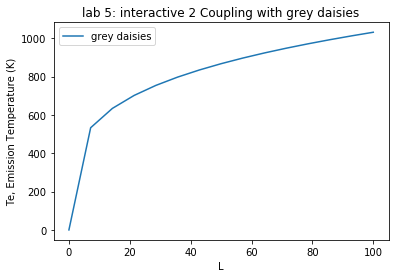

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Call the IntegCoupling class
teVals = []
Lvals=np.linspace(0,100,15)

for theL in Lvals:
    theSolver = IntegCoupling('coupling.yaml',theL) #sends yaml file and current L value to integrator
    timeVals, yVals, errorList = theSolver.timeloop5fixed()  #assigns results to time, y, and error
    teVals.append(theSolver.Te_4[-1])   #stores the last item in Te_4 array into a new list
    
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(Lvals, teVals)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
theAx.set_xlabel('L')
theAx.set_ylabel('Te, Emission Temperature (K)')
out=theAx.legend(theLines, ('grey daisies',), loc='best')

#thefig, theAx = plt.subplots(1, 1)
#theLines = theAx.plot(timeVals, yVals)
#theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
#theAx.set_xlabel('time')
#theAx.set_ylabel('fractional coverage')
#out=theAx.legend(theLines, ('grey daisies',), loc='best')

## Problem Coupling Part II

In [43]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.Te=[]
        self.daisy_temp=[]
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0
            
        self.Te.append(Te_4**(1/4))  #save Te
        self.daisy_temp.append(temp_y)      #save daisy temperature

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f

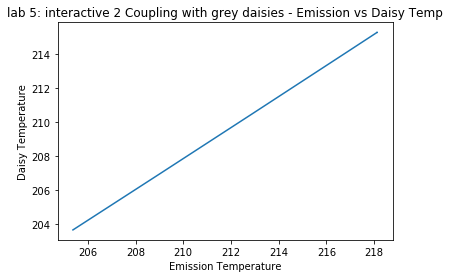

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theSolver = IntegCoupling('coupling.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

#print(theSolver.Te)
#print(theSolver.daisy_temp)


thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(theSolver.Te, theSolver.daisy_temp, label="Daisy Temperature")
#theLines2 = theAx.plot(timeVals, theSolver.Te, label="Emission Temperature")
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies - Emission vs Daisy Temp')
theAx.set_xlabel('Emission Temperature')
theAx.set_ylabel('Daisy Temperature')
#out=theAx.legend(theLines, ('grey daisies',), loc='best')

## Problem Initial

<a name="prob_initial"></a>

**Problem initial** The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the 
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?
<br><br>
  <font color = "red"> When the initial fraction of daisies is increased to 0.092 (with fraction of white daisies 0.24), it causes the white daisies to decline and reach a steady state condition at a population of zero for both daisies. </font> <br>
  

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?
    <br><br><font color = "red">
    When the initial white daisy population is increased (in this case to 0.25), then a non-zero steady state is reached. The initial concentration needs to be high enough that the white daisies can flourish. </font>

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.
    <font color = "red"> See below </font>

In [10]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ54(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L* user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

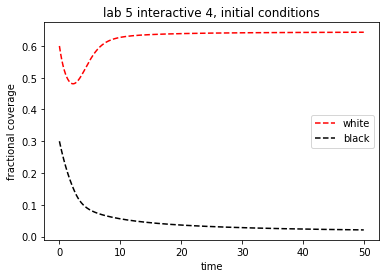

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='center right')



## Problem Conduction

**Problem Conduction** The conduction parameter R will determine the
temperature differential between the bare ground and the regions with
black or white daisies.  The code in the next cell specifies the derivatives
for this situation, removing the feedback between the daisies and the
planetary albedo but introducint conduction. Use it to investigate these two questions:

1.  Change the value of R and observe the effects on the daisy and
    emission temperature.

    <font color = "red"> See code for plots of R vs $\beta$, R vs Temperature at Steady State Coverage, and R vs Steady State Fractional Coverage </font>

2.  What are the effects on the daisy growth rate and the final steady
    states?
    
    <font color = "red"> RE: Effect of R on daisy growth rate:   As R increases from zero, the growth rate of black daisies declines, reaching zero around R = 0.4.  The growth rate of white daisies increases to a maximum at approximately R = 0.15, and then declines, reaching zero around R = 0.6. 
    
    <br><br>
    
    RE: Effect of R on final steady states:    As R increases from zero (given the initial fractions in the conduction.yaml file, the steady state fractional coverage of the black daisies declines to zero around R = 0.1, and steady state fractional coverage of the white daisies rises to a maximum at around R = 0.1 and then declines to zero around R = 0.5.    This also approximately correlates to a temperature when steady states are reached at the lower bound of acceptable temperatures for white daisies (i.e. growth rate is reduced to zero because temp is less than 277.5K) and the upper bound of acceptable temperatures for black daisies (i.e. growth rate is reduced to zero because temp is greater than 312.5K). </font>
    

[array([ 0.53981805,  0.13495451]), array([ 0.69396458,  0.00444068]), array([  6.91236618e-01,   1.30048652e-04]), array([  6.41578630e-01,   1.56978516e-06]), array([  4.79111586e-01,   3.15218433e-08]), array([  3.98624656e-04,   3.15218433e-08]), array([  1.26087373e-07,   3.15218433e-08]), array([  1.26087373e-07,   3.15218433e-08]), array([  1.26087373e-07,   3.15218433e-08]), array([  1.26087373e-07,   3.15218433e-08]), array([  1.26087373e-07,   3.15218433e-08])]


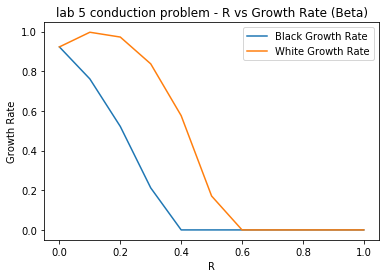

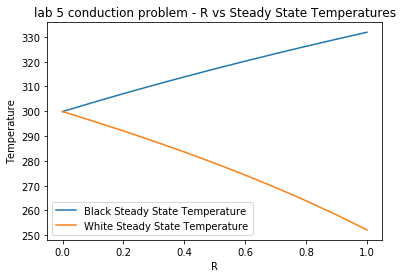

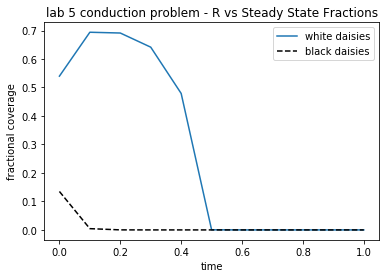

In [53]:
#
## 5.2  keep the albedo constant at alpha_p and vary the conductivity R
#
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


class Integ53(Integrator):

    def set_yinit(self, newR):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        self.config["uservars"]["R"] = newR
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.wh = []
        self.bl = []
        self.sstb = [] #steady state temp black
        self.sstw = [] #steady state temp white
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName, newR):
        super().__init__(coeffFileName)
        self.set_yinit(newR)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0] - y[1]
        #
        # hard wire the albedo to that of the ground -- no daisy feedback
        #
        albedo_p = user.albedo_ground
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L* user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25

        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        
        self.bl.append(beta_b)
        self.wh.append(beta_w)
        self.sstb.append(temp_b)
        self.sstw.append(temp_w)
            
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f

    
    
bgrowth = []
wgrowth = []
sstempb = []
sstempw = []
ssA = []
Rvals = np.linspace(0,1,11)

for theR in Rvals:
    theSolver = Integ53('conduction.yaml', theR)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    bgrowth.append(theSolver.bl[-1])
    wgrowth.append(theSolver.wh[-1])
    sstempb.append(theSolver.sstb[-1])
    sstempw.append(theSolver.sstw[-1])
    ssA.append(yVals[-1])
    
print(ssA)
    
plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines_b = theAx.plot(Rvals, bgrowth, label='Black Growth Rate')
theLines_w = theAx.plot(Rvals, wgrowth, label='White Growth Rate')
theAx.set_title('lab 5 conduction problem - R vs Growth Rate (Beta)')
theAx.set_xlabel('R')
theAx.set_ylabel('Growth Rate')
theAx.legend(loc='best')

thefig2, theAx2 = plt.subplots(1,1)
theLines_b2 = theAx2.plot(Rvals,sstempb, label='Black Steady State Temperature')
theLines_w2 = theAx2.plot(Rvals,sstempw, label='White Steady State Temperature')
theAx2.set_title('lab 5 conduction problem - R vs Steady State Temperatures')
theAx2.set_xlabel('R')
theAx2.set_ylabel('Temperature')
theAx2.legend(loc='best')

thefig3, theAx3 = plt.subplots(1,1)
theLines_frac = theAx3.plot(Rvals,ssA)
theLines_frac[1].set_linestyle('--')
theLines_frac[1].set_color('k')
theAx3.set_title('lab 5 conduction problem - R vs Steady State Fractions')
theAx3.set_xlabel('time')
theAx3.set_ylabel('fractional coverage')
out=theAx3.legend(theLines_frac, ('white daisies', 'black daisies'), loc='best')


## Problem Temperature

<a name="prob_temperature"></a>

**Problem Temperature**:  The code above adds a new method, ```find_temp``` that takes the white/black daisy fractions and calculates local and planetary temperatures.

1. override ```timeloop5fixed``` so that it saves these three temperatures, plus the daisy growth rates
   to new variables in the Integ54 instance
   
2. Make plots of (temp_w, temp_b) and (beta_w, beta_b) vs. time for a case with non-zero equilibrium
   concentrations of both black and white daisies

In [1]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ54(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.bet_b = []
        self.bet_w = []
        self.tempb = [] #steady state temp black
        self.tempw = [] #steady state temp white
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L* user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        
        self.bet_b.append(beta_b)
        self.bet_w.append(beta_w)
        self.tempb.append(temp_b)
        self.tempw.append(temp_w)
        
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f



In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()


print(theSolver.bet_b)

daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='center right')



AttributeError: 'Integ54' object has no attribute 'bet_b'

## Problem Estimate

<a name="prob_estimate"></a>

**Problem Estimate**: In the demo below, compare the error estimate to
the true error, on the initial value problem from ,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$ 

which has the exact
solution 

$$y(t) = t + e^{-t}$$

1.  Play with the time step and final time, attempting small changes at
    first. How reasonable is the error estimate?
    
    <font color = "red"> The estimated error is generally within an order of magnitude of the actual error, and results in the truncated function being close to the exact solution and so is reasonable. </font>

2.  Keep decreasing the time step. Does the error estimate diverge from
    the computed error? Why?
    
    <font color = "red">  (decreasing from dt = 2 to dt = 0.01)  Yes, the actual error reduces to zero (around dt = 0.7 s), and then becomes negative (because it represents the difference between the estimated and actual solution, while the estimated error stays positive, but reduces in magnitude. </font>
    

3.  Keep increasing the time step. Does the error estimate diverge? What
    is happening with the numerical solution?
    
    <font color = "red"> (increasing from dt = 2 to dt = 10)   With higher time steps, the actual error starts to exceed the estimated error but follows similar trend. Beyond about Dt = 3, the solution starts falling apart (starts to become zero), but the actual and estimated error don't diverge and still are similar. </font>
    
    <font color = "red"> (note I have screen shots taken of the graphs for ~6 iterations of Tend and ~9 iterations of dt which I can send if required </font>

In [65]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ55(Integrator):

    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user=self.uservars
        f=np.empty_like(self.yinit)
        f[0]=user.c1*y[0] + user.c2*theTime + user.c3;
        return f




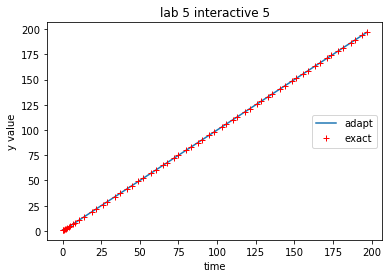

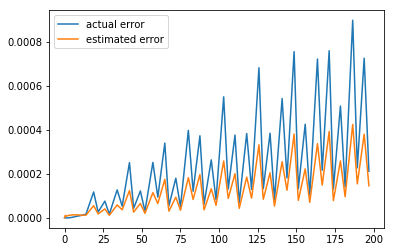

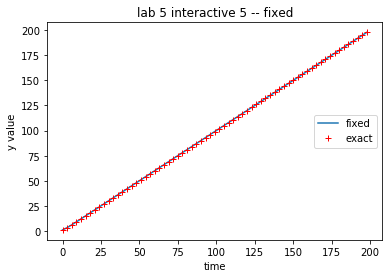

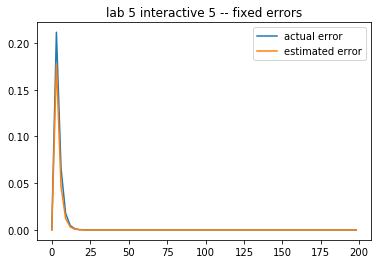

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

theSolver=Integ55('expon.yaml')

timeVals,yVals,yErrors =theSolver.timeloop5Err()
timeVals=np.array(timeVals)
exact=timeVals + np.exp(-timeVals)
yVals=np.array(yVals)
yVals=yVals.squeeze()
yErrors=np.array(yErrors)

thefig,theAx=plt.subplots(1,1)
line1=theAx.plot(timeVals,yVals,label='adapt')
line2=theAx.plot(timeVals,exact,'r+',label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig,theAx=plt.subplots(1,1)
realestError = yVals - exact
actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
theAx.legend(loc='best')


timeVals,yVals,yErrors =theSolver.timeloop5fixed()

np_yVals=np.array(yVals).squeeze()
yErrors=np.array(yErrors)
np_exact=timeVals + np.exp(-timeVals)


thefig,theAx=plt.subplots(1,1)
line1=theAx.plot(timeVals,np_yVals,label='fixed')
line2=theAx.plot(timeVals,np_exact,'r+',label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig,theAx=plt.subplots(1,1)
realestError = np_yVals - np_exact
actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')

## Problem Tolerances

<a name="prob_tolerances"></a>

**Problem Tolerances**: The Runge-Kutta algorithm with adaptive time
steps will, in general, be more efficient and accurate than same
algorithm with fixed time steps. In other words, greater accuracy can
usually be achieved in fewer time steps. For the given set of Daisyworld
parameters and initial conditions,

1.  Decrease the error tolerances and compare the plots. You will note
    that as the error tolerances are decreased, the plots approach the
    one created by the algorithm with fixed time steps. What does this
    imply?
    
    <font color = "red"> This implies that the adaptive step size process provides a good alternative to the fixed time step method, and only uses additional tighter time steps in sections where the curvature is changing quickly, allowing for potentially faster computation times for a given acceptable level of accuracy. </font>
    
2.  Compare the Daisyworld plot to a plot of the stepsizes. Do you see a
    correlation between stepsize and the shape of the curve?
    
    <font color = "red"> Yes, the step sizes are smaller where the curvature is tighter. </font>

3.  Play with the tolerances and see if you can re-create (roughly) the
    same plot but in fewer time steps.
    
    <font color = "red"> 1E-3 tolerances do a pretty good job </font>

## Problem Adaptive

<a name="prob_adaptive"></a>

**Problem adaptive** The demos in the previous section, solved the
Daisyworld equations using the embedded Runge-Kutta methods with
adaptive timestep control. 

1.  Run the code and find solutions of Daisyworld with the default
    settings found in adapt.yaml using the timeloop5Err adaptive
    code
    
    <font color = "red"> Complete </font>
    
2.  Find the solutions again but this time with fixed stepsizes and
    compare the size of the timesteps and number of the timesteps.
    
    <font color = "red"> Complete. The fixed version uses 500 time steps (dt = 0.1, tend = 50), where the adaptive one uses 23. </font>

3.  How much faster does the fixed timeloop need to be to give the
    same performance as the adaptive timeloop for this case?
    
    <font color = "red"> 20x faster </font>



In [91]:
# RUN WITH 1E-5
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=Integ54('adapt.yaml')
timeVals,yVals,errorList,numb,badst,goodst=theSolver.timeloop5Err()

print(len(timeVals)) # number of time steps
print(len(errorList))

yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'-b+',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--ko',label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')


# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

ValueError: not enough values to unpack (expected 6, got 3)

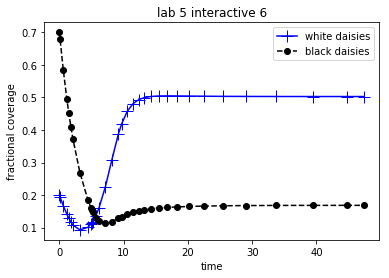

In [68]:
# RUN WITH 1E-6

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=Integ54('adapt.yaml')
timeVals,yVals,errorList=theSolver.timeloop5Err()

yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'-b+',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--ko',label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')


# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

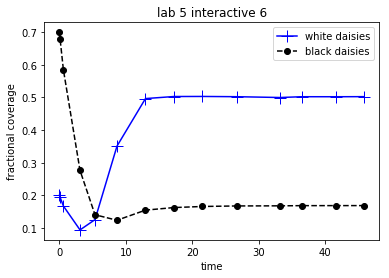

In [69]:
# RUN WITH 1E-3

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=Integ54('adapt.yaml')
timeVals,yVals,errorList=theSolver.timeloop5Err()

yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'-b+',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--ko',label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')


# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

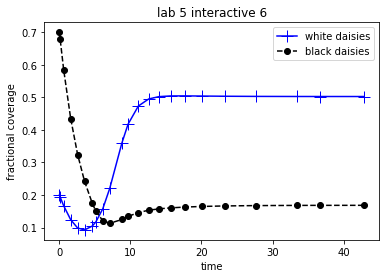

In [103]:
# RUN WITH FIXED TIME STEP

%matplotlib inline
import pandas as pd
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import yaml

theSolver=Integ54('adapt.yaml')
timeVals,yVals,errorList=theSolver.timeloop5Err()


yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

thefig,theAx=plt.subplots(1,1)

points,=theAx.plot(timeVals,yvals['white'],'-b+',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--ko',label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')


# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

## Problem Predator

Rate of change of rabbits:

$$
\frac{dP_r}{dt} = P_r (\frac{\beta_r}{x} - \chi_b P_r)
$$

where $P_r$ is the population of rabbits and $\chi_b$ is the death rate of rabbits

Revised rate of change of white daisies:

$$
\frac{dA_w}{dt} = A_w ( \beta_w x - P_r \chi) 
$$

Revised rate of change of black daisies:

$$
\frac{dA_b}{dt} = A_w ( \beta_b x - P_r \chi) 
$$

ValueError: too many values to unpack (expected 1)

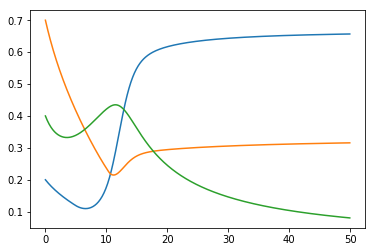

In [177]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ55(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground chi_r'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc and bunnyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc, self.initvars.bunnyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [3] with the white [0] and black [1]
                    daisy fractiion and bunny fraction
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L* user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           y[2]=fraction bunnies
           
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - y[2]*user.chi)
        f[1] = y[1] * (beta_b * bare - y[2]*user.chi)
        f[2] = y[2] * (0.35 *(bare) - user.chi_r*y[2])
        return f

theSolver = Integ55('pred.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()



thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, yvals, label=('white', 'black', 'bunnies'))
#line2, = theAx.plot(timevals, yvals[1])
#line3, = theAx.plot(timevals, yvals[2])
#line1.set(linestyle='--', color='r', label=('white', 'black', 'bunnies'))
#line2.set(linestyle='--', color='k', label='black')
#theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='center right')
